# High Pass Filter Using the Spectral Reversal Technique
We can create a high pass filter by using as reference a low pass filter and a technique called **Spectral Reversal**. For this notebook we will use the *Windowed-Sinc Filters* Notebook results, which are pickled in an serialized object called `save_data.pickle`.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

We load the low pass data from the *Windowed-Sinc Filters* Notebook

In [3]:
file = open('save_data.pickle', 'rb')
data = pickle.load(file)
file.close()
#data.keys()

ecg = np.array(data['ecg'])
low_pass = np.array(data['low_pass'])
low_pass = low_pass/np.sum(low_pass)
fft_low_pass = np.array(data['fft_low_pass'])
#fft_low_pass = fft_low_pass/np.sum(fft_low_pass)

To generate the high pass filter, we use the Sprectral Reversal methond, which consist of multiplying the low pass filter response $h_{lp}[n]$ with $(-1)^{-n}$. Therefore the high pass filter response is given by:
$$h_{hp}[n] = h_{lp}[n](-1)^{-n}$$

In [5]:
N = len(low_pass)
print(N)
high_pass = low_pass * ((-1) ** np.arange(N))
fft_high_pass_response= np.fft.fft(high_pass)
#fft_high_pass = np.absolute(fft_high_pass_response)
fft_high_pass = np.absolute(fft_high_pass_response)/np.sum(np.absolute(fft_high_pass_response))

100


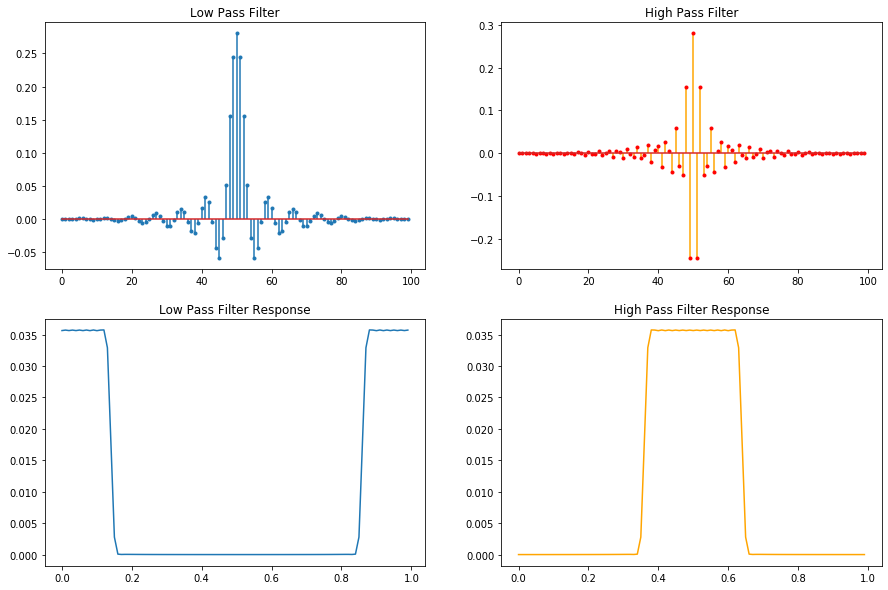

In [8]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2,2,1)
plt.stem(low_pass, markerfmt='.', use_line_collection=True)
plt.title('Low Pass Filter')

plt.subplot(2,2,2)
plt.stem(high_pass, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('High Pass Filter')

plt.subplot(2,2,3)
#plt.plot(fft_low_pass)
plt.plot(np.arange(len(fft_low_pass))/len(fft_low_pass), fft_low_pass)
##plt.stem(np.arange(len(fft_low_pass))/len(fft_low_pass), fft_low_pass, markerfmt='.', use_line_collection=True)
plt.title('Low Pass Filter Response')


plt.subplot(2,2,4)
#plt.plot(fft_high_pass)
plt.plot(np.arange(len(fft_high_pass))/len(fft_high_pass), fft_high_pass, color='orange')
##plt.stem(np.arange(len(fft_high_pass))/len(fft_high_pass), fft_high_pass, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('High Pass Filter Response');

**This frequency response is a “left-right flipped” version of the frequency response of the low-pass filter.**

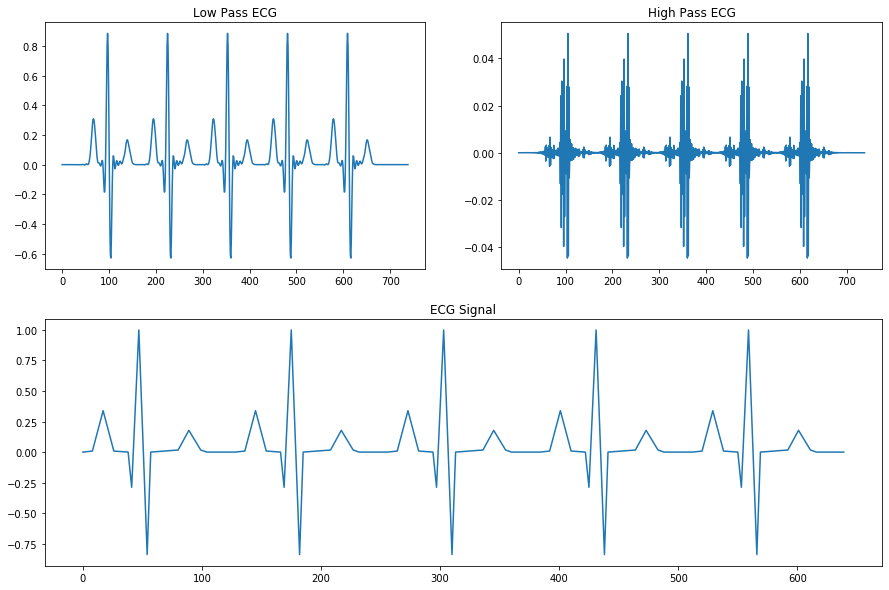

In [9]:
low_pass_ecg = np.convolve(ecg,low_pass)
high_pass_ecg = np.convolve(ecg,high_pass)


plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2,2,1)
plt.plot(low_pass_ecg)
plt.title('Low Pass ECG')

plt.subplot(2,2,2)
plt.plot(high_pass_ecg)
plt.title('High Pass ECG')

plt.subplot(2,1,2)
plt.plot(ecg)
plt.title('ECG Signal');

## Why Does Spectral Reversal Work?

The spectral reversal technique is based on the so-called shift theorem of the Fourier transform. Formulated for the discrete case, the shift theorem says that, for a Fourier transform pair $x[n]⟷X[k]$, a shift by $s$ samples in the frequency domain is equivalent with multiplying by a complex exponential in the time domain, as

$$x[n]e^{j2πns/N}⟷X[k−s]$$

In general, the result of doing this will be complex. This is not a problem, but let’s investigate in which circumstances the result is not complex. This is may be easiest to see with the complex exponential rewritten using Euler’s Identity,

$$e^{j2πns/N}=\cos{(2πns/N)}+j\sin{(2πns/N)}$$

This expression is real if the sine term is zero, which is the case if the angle is zero or $\pi$

We get this result if we shift by $s=N/2$ samples, because then the angles become $2πns/N=nπ$. Of course, in that case the complete expression becomes $\cos{(nπ)}$, which is exactly the sequence $1,−1,1,−1,…$.

#### Reference:
[1] https://tomroelandts.com/articles/spectral-reversal-to-create-a-high-pass-filter